 Dataset Source:
The dataset used for analysis (`2019 Oct.csv`) is stored locally and excluded from version control for size reasons. Please refer to the project documentation or contact the author for access or details about the data source.

 Import pandas library
We use pandas for data manipulation and analysis.

In [2]:
import pandas as pd

Load the dataset
Read the CSV file '2019 Oct.csv' into a pandas DataFrame for analysis.

In [3]:
df=pd.read_csv('2019 Oct.csv')
# df=pd.read_csv('sample.csv')

In [4]:
df = df.head(10000)

In [5]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140.0,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717.0,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250.0,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,NaN,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217.0,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...
9995,2019-10-01 02:37:18 UTC,view,45600168,2113934850560885372,apparel.shoes.keds,nike,59.18,539620652.0,2b8f3a28-5ca3-4038-a48f-021db1c8d1dc
9996,2019-10-01 02:37:18 UTC,view,32403314,2053013566562238479,NaN,NaN,25.48,516770039.0,76b06dcb-c92f-4fa8-8d35-d290cadc29c5
9997,2019-10-01 02:37:18 UTC,view,1004838,2053013555631882655,electronics.smartphone,oppo,179.38,527209005.0,cbfdc1b0-39b7-4d1d-bce3-b79fc6b6c7cf
9998,2019-10-01 02:37:18 UTC,view,3601063,2053013563810775923,appliances.kitchen.washer,artel,NaN,536457776.0,917a738a-5505-44b0-b336-96f5f0028b04


In [6]:
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Handling Missing Values
Visualizing and addressing missing values is a key step in data cleaning. We use a heatmap to identify missing data patterns and decide whether to impute or drop missing values based on their impact on analysis.

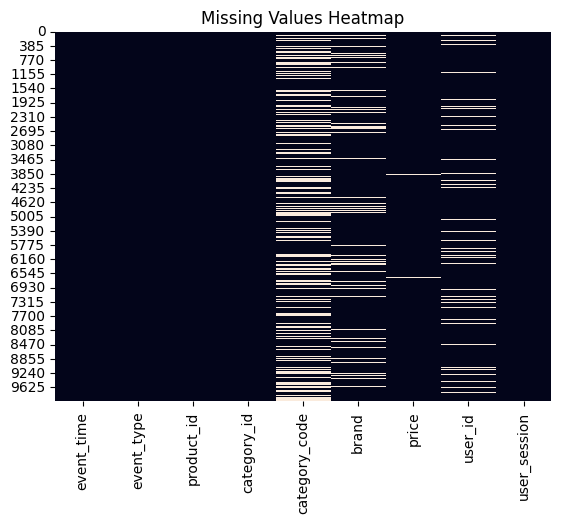

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   event_time     10000 non-null  object 
 1   event_type     10000 non-null  object 
 2   product_id     10000 non-null  int64  
 3   category_id    10000 non-null  int64  
 4   category_code  6723 non-null   object 
 5   brand          8558 non-null   object 
 6   price          9909 non-null   float64
 7   user_id        8978 non-null   float64
 8   user_session   10000 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 703.3+ KB


# Next Steps: Data Cleaning
To complete the cleaning process for e-commerce user event data, perform the following steps:

- Handle missing values (impute or drop as appropriate)

- Remove duplicate records

- Detect and address outliers

- Validate data types and ranges

- Document any cleaning decisions


Proceed with code cells for each cleaning step.

## Strategies for Handling Missing Values
After visualizing missing data, we can address it by either imputing (filling in) missing values or dropping rows/columns with missing data. The choice depends on the amount and importance of missing data:

- **Imputation:** Fill missing values using mean, median, mode, or other methods.
- **Dropping:** Remove rows or columns with excessive missing values if they are not critical for analysis.

Careful handling ensures data quality and reliable analysis.

In [9]:
# Handle missing values: drop rows with >50% missing, impute remaining with mean (numeric columns)
threshold = int(df.shape[1] * 0.5)
df_cleaned = df.dropna(thresh=threshold)

# Impute remaining missing values in numeric columns with mean
for col in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mean())

# Check result
print('Rows after cleaning:', df_cleaned.shape[0])
df_cleaned.isna().sum()

Rows after cleaning: 10000


event_time          0
event_type          0
product_id          0
category_id         0
category_code    3277
brand            1442
price               0
user_id             0
user_session        0
dtype: int64

In [10]:
# Handle missing values directly in df
threshold = int(df.shape[1] * 0.5)
df.dropna(thresh=threshold, inplace=True)

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].mean(), inplace=True)

print('Rows after cleaning:', df.shape[0])
df.isna().sum()

Rows after cleaning: 10000


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18056\3405301885.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


event_time          0
event_type          0
product_id          0
category_id         0
category_code    3277
brand            1442
price               0
user_id             0
user_session        0
dtype: int64

In [11]:
# Handle missing values without using inplace
threshold = int(df.shape[1] * 0.5)
df = df.dropna(thresh=threshold)

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].mean())

print('Rows after cleaning:', df.shape[0])
df.isna().sum()

Rows after cleaning: 10000


event_time          0
event_type          0
product_id          0
category_id         0
category_code    3277
brand            1442
price               0
user_id             0
user_session        0
dtype: int64

In [12]:
# Remove duplicate rows
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f"Removed {before - after} duplicate rows. Remaining rows: {after}")

Removed 3 duplicate rows. Remaining rows: 9997


## What are Outliers?

Outliers are data points that deviate significantly from other observations in your dataset.

They can occur due to:
- Data entry errors
- Measurement errors
- Natural variability (some users spend much more than others)

**Examples in your dataset:**
- Extremely high-priced items (price column)
- Unusually high number of purchases by a single user

**Why it matters for clustering:**
Clustering algorithms like K-Means are distance-based. Outliers can skew centroids, leading to poor cluster definitions.

In [14]:
# Detect and remove outliers using the IQR method for all numeric columns (collect indices and remove all at once)
import numpy as np
numeric_cols = df.select_dtypes(include=[np.number]).columns
outlier_index = set()
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_index.update(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index)
print(f"Total unique outliers across all numeric columns: {len(outlier_index)}")
df = df.drop(outlier_index)
print(f"Rows after removing outliers: {df.shape[0]}")

Total unique outliers across all numeric columns: 407
Rows after removing outliers: 8129


## Validating Data Types and Value Ranges

After handling missing values, duplicates, and outliers, it's important to ensure that each column has the correct data type and that values fall within expected ranges. This step helps prevent errors in downstream analysis and modeling.
print("Data types before correction:")
print(df.dtypes)

for col in df.select_dtypes(include=[np.number]).columns:
    min_val = df[col].min()
    max_val = df[col].max()
    print(f"{col}: min={min_val}, max=`{max_val}")

print("\nData types after correction:")
print(df.dtypes)

In [ ]:
# Correct data types for all relevant columns
if 'event_time' in df.columns:
    df['event_time'] = pd.to_datetime(df['event_time'], errors='coerce')
if 'event_type' in df.columns:
    df['event_type'] = df['event_type'].astype(str)
if 'product_id' in df.columns:
    df['product_id'] = df['product_id'].astype(str)
if 'category_id' in df.columns:
    df['category_id'] = df['category_id'].astype('category')
if 'category_code' in df.columns:
    df['category_code'] = df['category_code'].astype(str)
if 'brand' in df.columns:
    df['brand'] = df['brand'].astype(str)
if 'price' in df.columns:
    df['price'] = pd.to_numeric(df['price'], errors='coerce')
if 'user_id' in df.columns:
    df['user_id'] = df['user_id'].astype(str)
if 'user_session' in df.columns:
    df['user_session'] = df['user_session'].astype(str)

## Categorical Encoding for Machine Learning
To prepare categorical features for machine learning algorithms, we apply encoding techniques:
- **One-Hot Encoding:** Converts each category value into a new binary column. Used for 'brand', 'category_code', and 'event_type'.
- **Label Encoding:** Assigns each unique category value an integer label. Useful for algorithms that can interpret integer values as categories.

These encodings transform categorical variables into a format suitable for clustering and other ML models.

All Data Type Corrections Applied:-

The following columns were converted to their appropriate types for analysis:

- `event_time`: converted to datetime
- `event_type`: converted to string
- `product_id`: converted to string
- `category_id`: converted to category
- `category_code`: converted to string
- `brand`: converted to string
- `price`: converted to numeric
- `user_id`: converted to string
- `user_session`: converted to string

These conversions ensure that each column is interpreted correctly for downstream analysis and modeling.

## Categorical Encoding for Machine Learning
Machine learning algorithms require numerical input, but many features in e-commerce data are categorical (e.g., brand, category, event type). Encoding techniques transform these categorical variables into a numerical format so that algorithms can process and learn from them.

We use two main encoding methods:
- **One-Hot Encoding:** Converts each category value into a new binary column. Used for 'brand', 'category_code', and 'event_type'.
- **Label Encoding:** Assigns each unique category value an integer label. Useful for algorithms that can interpret integer values as categories.


### Example: One-Hot Encoding
- **Input:** ['red', 'green', 'blue']
- **Output:**
    | red | green | blue |
    |-----|-------|------|
    |  1  |   0   |  0   |
    |  0  |   1   |  0   |
    |  0  |   0   |  1   |
One-Hot Encoding is preferred for clustering and most ML algorithms, as it avoids implying any order or priority among categories.

## Feature Scaling for Machine Learning
Feature scaling is an essential preprocessing step for numeric columns (such as 'price') before clustering. We use StandardScaler to standardize numeric features to have mean 0 and variance 1. This ensures that all features contribute equally to distance-based algorithms like KMeans, preventing features with larger scales from dominating the clustering process.

In our pipeline, StandardScaler is applied to numeric columns automatically before clustering.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# Define columns
categorical_cols = ['brand', 'category_code', 'event_type']
numeric_cols = ['price']

# Preprocessing: OneHot for categorical, Scale for numeric
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
 )

# Full pipeline: Preprocessing + Clustering
pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('cluster', KMeans(n_clusters=4, random_state=42))
 ])

# Fit the pipeline
pipeline.fit(df[categorical_cols + numeric_cols])

# Predict clusters
df['cluster'] = pipeline.predict(df[categorical_cols + numeric_cols])